# Michael Melillo
# 11/26/2024
# Analysis Plan

**Importing, I am not using all of these modules now but it is good to have them loaded at the beginning so that we can stay structural.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

**I am loading the alcohol consumption data into a Pandas DataFrame using pd.read_csv(). This will help us analyze the dataset and work with it more easily. This data came from Openicpsr and the data analyzes the apparent per capita alcohol consumption trends in the U.S. from 1977 to 2018**

**Alcohol_data.head() is showing us the frst 5 rows and all the columns contained within the data**

In [3]:
alcohol_data = pd.read_csv('apparent_per_capita_alcohol_consumption_1977_2018.csv')
alcohol_data.head()

,state,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,alabama,2018,1.04,0.26,0.69,1.99,246.518519,51.596899,143.260341,424.533333
1,alabama,2017,1.07,0.26,0.67,1.99,253.629630,51.596899,139.107867,424.533333
2,alabama,2016,1.09,0.26,0.65,2.01,258.370370,51.596899,134.955393,428.800000
3,alabama,2015,1.11,0.26,0.64,2.01,263.111111,51.596899,132.879157,428.800000
4,alabama,2014,1.13,0.25,0.62,2.00,267.851852,49.612403,128.726683,426.666667


**Here we are displaying the column names in the dataset using alcohol_data.keys(). This will help us understand the structure 
of the data and what variables are available for analysis.**

In [4]:
alcohol_data.keys()

Index(['state', 'year', 'ethanol_beer_gallons_per_capita',
       'ethanol_wine_gallons_per_capita', 'ethanol_spirit_gallons_per_capita',
       'ethanol_all_drinks_gallons_per_capita', 'number_of_beers',
       'number_of_glasses_wine', 'number_of_shots_liquor',
       'number_of_drinks_total'],
      dtype='object')

**In this code cell we are getting an overview of the data types and structure, it shows us there are 10 columns, the names and our dtypes.**

In [5]:
alcohol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   state                                  2352 non-null   object 
 1   year                                   2352 non-null   int64  
 2   ethanol_beer_gallons_per_capita        2352 non-null   float64
 3   ethanol_wine_gallons_per_capita        2352 non-null   float64
 4   ethanol_spirit_gallons_per_capita      2352 non-null   float64
 5   ethanol_all_drinks_gallons_per_capita  2352 non-null   float64
 6   number_of_beers                        2352 non-null   float64
 7   number_of_glasses_wine                 2352 non-null   float64
 8   number_of_shots_liquor                 2352 non-null   float64
 9   number_of_drinks_total                 2352 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 183.9+ KB


**This Line of Code is Checking to see if there is any missing data, we need to take this into account when making our further analysis**

In [6]:
alcohol_data.isnull()

,state,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2347,False,False,False,False,False,False,False,False,False,False
2348,False,False,False,False,False,False,False,False,False,False
2349,False,False,False,False,False,False,False,False,False,False
2350,False,False,False,False,False,False,False,False,False,False


**Research Question -** Has total per capita alcohol consumption in the U.S. increased or decreased from 1977 to 2018?
### Expected Outcomes and Implications (Hypothesis):
I hypothesize that the total alcohol consumption will show a slight increase over the years observed.  

**Importance of the Hypothesis**:  
Understanding trends in alcohol consumption over time is very important for public health and economic insights. Alcohol consumption has direct effects on public health, such as liver disease rates, addiction, and mental health. By examining trends from 1977 to 2018, we can assess whether alcohol consumption is rising or falling, which may have implications for regulation and professionals who deal with behaviors.

**Data Approach and Link to the Question**:  
The dataset provided trends per capita alcohol consumption annually, spanning from 1977 to 2018. With this time frame we can analyze alcohol consumption trends and determine if they show a significant increase, decrease, or stay the same over the years. Using statistical analysis and data visualizations, we can answer the research question and draw conclusions about alcohol consumption patterns in the U.S. during this period.

**Overview of the Data**:  
The data includes yearly records of alcohol consumption, which is measured in liters of pure alcohol per capita for each year. . This data will allow us to identify trends and patterns over time. The dataset used in this analysis comes from OPENICPSR and was compiled by Jacob Kaplan. It details apparent per capita alcohol consumption trends in the U.S. from 1977 to 2018 at national, state, and regional levels. This dataset is considered reliable as it comes from a reputable source, OPENICPSR, and is widely used in research to track long-term alcohol consumption trends in the U.S. 

Citation: Kaplan, Jacob. Apparent Per Capita Alcohol Consumption: National, State, and Regional Trends 1977-2018. Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2021. https://doi.org/10.3886/E105583V5.

### Description of the Data Structure and Data Types

The dataset used for this project includes annual records of alcohol consumption in the U.S. from 1977 to 2018. Each row in the 
dataset represents data for one specific year.

#### Data Structure:
- **Rows**: Each row corresponds to one year from 1977 to 2018.
- **Columns**: The Columns represent the state, year and alcohol consumption.
- **Year**: The year the data was collected from 1977 to 2018
- **Alcohol Consumption (per capita)**: The total alcohol consumption per person in the U.S. for each year, measured in liters of pure alcohol.
- **Alcohol Type** beer, wine, spirits.


#### Data Types:
- **Year**: The year value is an integer that represents the specific year of the record.
- **Alcohol Consumption**: This column represents the total amount of alcohol consumed per capita, measured in liters of pure alcohol

#### Handling Missing Data:
- If there are any data missing in the dataset those rows will be dropped if necessary to ensure tidy data for analysis.
#### Graph Types:
I will be using various graphs like bar graphs, scatter plots and other plots to show the change in aclcohol consumption over time providing 
a visual comparison for each year.

#### First few rows of the dataset
Here is a sample of the first few rows from the dataset:

In [7]:
alcohol_data.head()

,state,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,alabama,2018,1.04,0.26,0.69,1.99,246.518519,51.596899,143.260341,424.533333
1,alabama,2017,1.07,0.26,0.67,1.99,253.629630,51.596899,139.107867,424.533333
2,alabama,2016,1.09,0.26,0.65,2.01,258.370370,51.596899,134.955393,428.800000
3,alabama,2015,1.11,0.26,0.64,2.01,263.111111,51.596899,132.879157,428.800000
4,alabama,2014,1.13,0.25,0.62,2.00,267.851852,49.612403,128.726683,426.666667


In [8]:
alcohol_data.tail()

,state,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
2347,us total,1981,1.39,0.35,1.02,2.76,329.481481,69.457364,211.776156,588.800000
2348,us total,1980,1.37,0.34,1.04,2.75,324.740741,67.472868,215.928629,586.666667
2349,us total,1979,1.34,0.31,1.04,2.70,317.629630,61.519380,215.928629,576.000000
2350,us total,1978,1.30,0.30,1.05,2.66,308.148148,59.534884,218.004866,567.466667
2351,us total,1977,1.27,0.29,1.04,2.60,301.037037,57.550388,215.928629,554.666667


In [9]:
alcohol_data.describe()

,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
count,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000,2352.000000
mean,1997.500000,1.279269,0.346144,0.850391,2.476063,303.234064,68.692085,176.561343,528.226757
std,12.123496,0.228744,0.182142,0.347001,0.609605,54.220899,36.145971,72.045606,130.049158
min,1977.000000,0.580000,0.080000,0.360000,1.190000,137.481481,15.875969,74.744526,253.866667
25%,1987.000000,1.120000,0.210000,0.650000,2.130000,265.481481,41.674419,134.955393,454.400000
50%,1997.500000,1.270000,0.310000,0.770000,2.360000,301.037037,61.519380,159.870235,503.466667
75%,2008.000000,1.400000,0.450000,0.960000,2.700000,331.851852,89.302326,199.318735,576.000000
max,2018.000000,2.170000,1.210000,3.560000,6.320000,514.370370,240.124031,739.140308,1348.266667


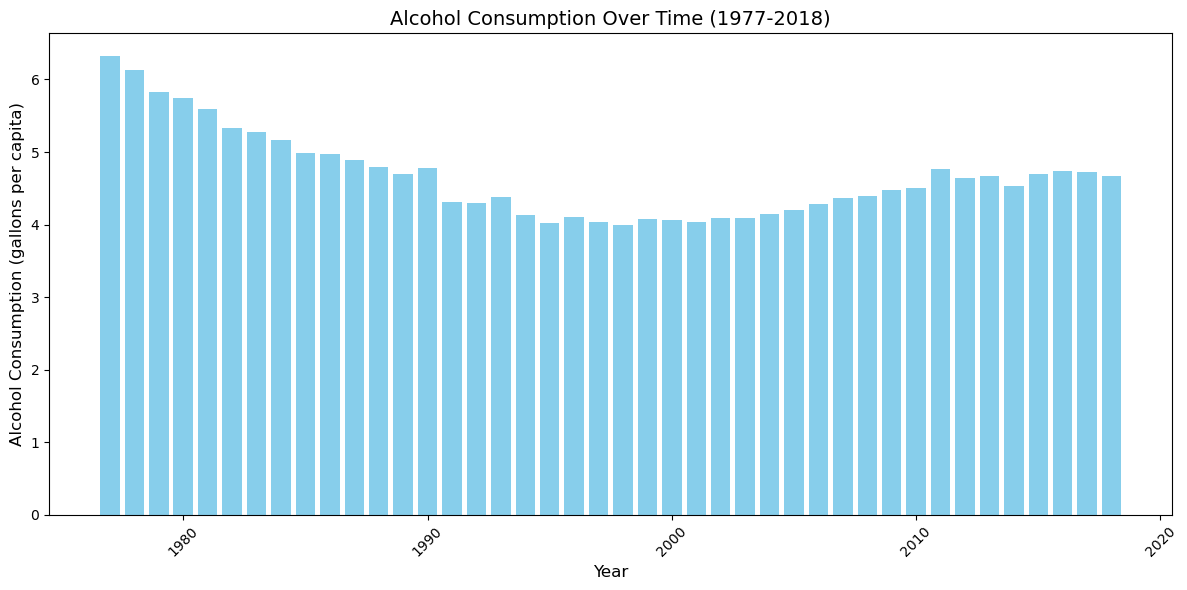

In [10]:
# Bar graph for total alcohol consumption over time
plt.figure(figsize=(12, 6))  # Adjust the figure size
plt.bar(alcohol_data['year'], alcohol_data['ethanol_all_drinks_gallons_per_capita'], color='skyblue')
plt.title('Alcohol Consumption Over Time (1977-2018)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Alcohol Consumption (gallons per capita)', fontsize=12)
plt.xticks (rotation=45)  
plt.yticks(fontsize=10)
plt.tight_layout()  # Ensure everything fits well
plt.show()


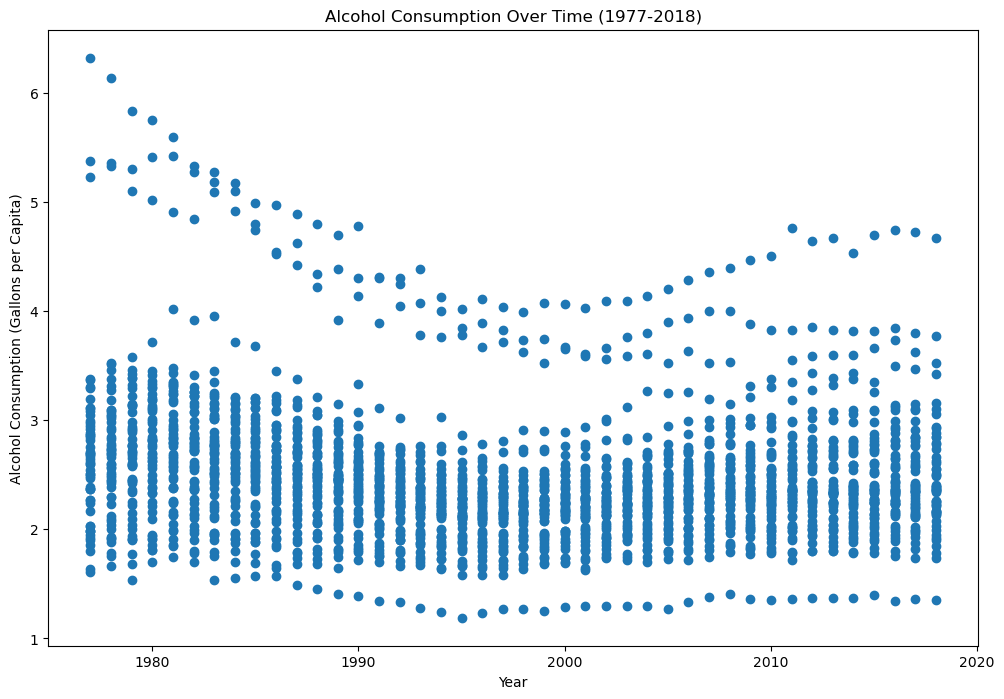

In [11]:
plt.figure(figsize=(12, 8))


plt.scatter(alcohol_data['year'], alcohol_data['ethanol_all_drinks_gallons_per_capita'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Alcohol Consumption (Gallons per Capita)')
plt.title('Alcohol Consumption Over Time (1977-2018)')

# Display the plot
plt.show()

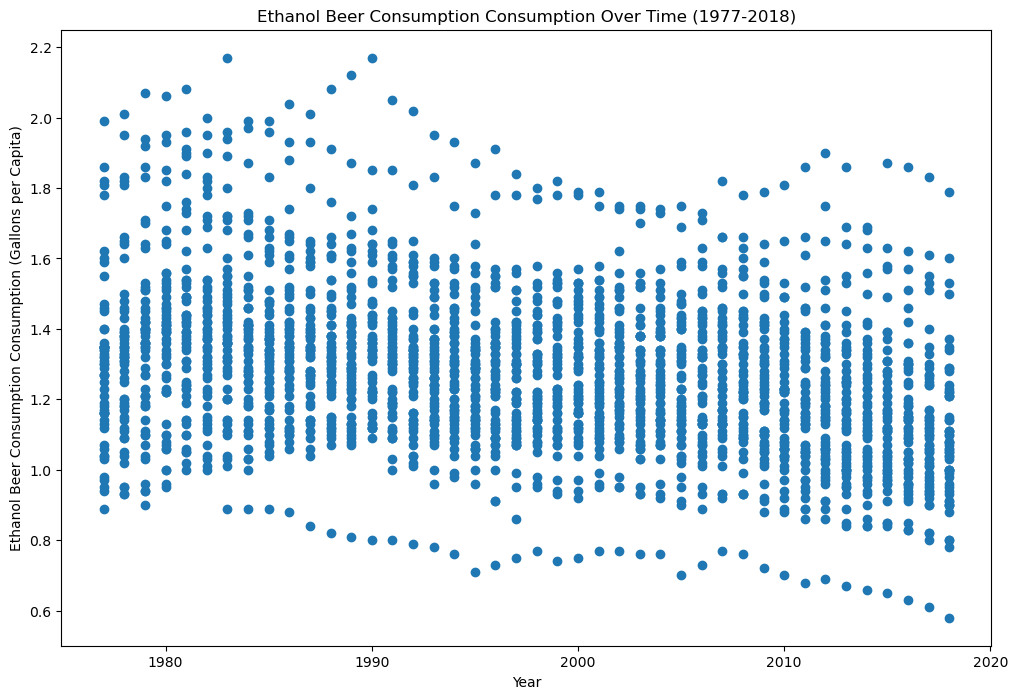

In [12]:
plt.figure(figsize=(12, 8))


plt.scatter(alcohol_data['year'], alcohol_data['ethanol_beer_gallons_per_capita'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Ethanol Beer Consumption Consumption (Gallons per Capita)')
plt.title('Ethanol Beer Consumption Consumption Over Time (1977-2018)')

# Display the plot
plt.show()

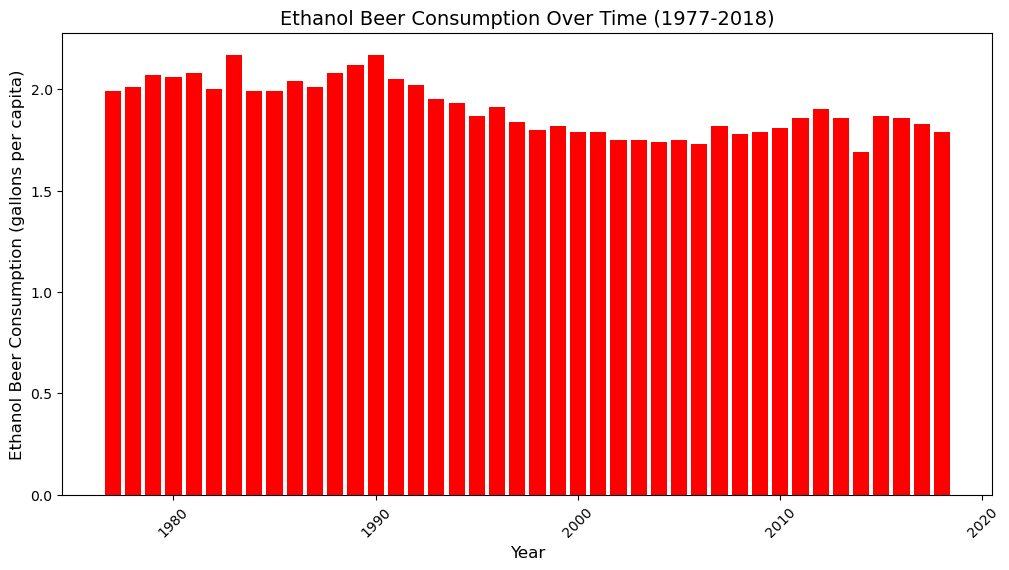

In [13]:
plt.figure(figsize=(12, 6))  # Adjust the figure size
plt.bar(alcohol_data['year'], alcohol_data['ethanol_beer_gallons_per_capita'], color='red')
plt.title('Ethanol Beer Consumption Over Time (1977-2018)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Ethanol Beer Consumption (gallons per capita)', fontsize=12)
plt.xticks (rotation=45)  
plt.yticks(fontsize=10)

plt.show()

<Figure size 1500x800 with 0 Axes>

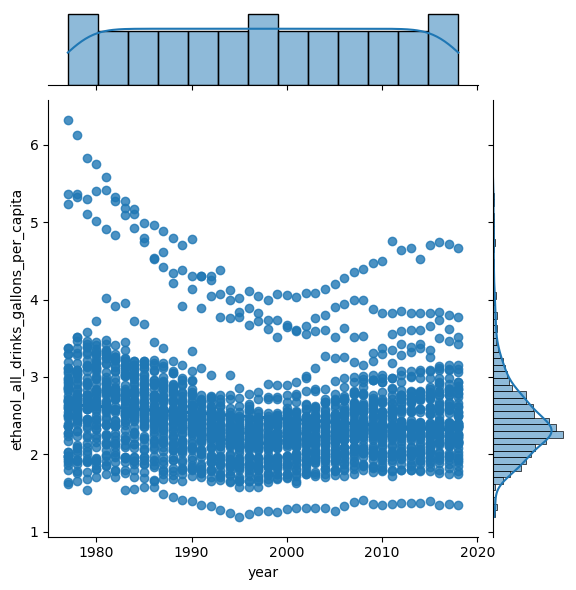

In [14]:
plt.figure(figsize=(15, 8))
sns.jointplot(kind='reg', data=alcohol_data, 
              x='year', y='ethanol_all_drinks_gallons_per_capita')

# Display the plot
plt.show()